In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Load the dataset
songs_data = pd.read_csv("../data/songs_data.csv")

In [3]:
songs_data.head ()

,track_id,track_name,track_artist,track_popularity,playlist_name,playlist_id,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


# 1.0 Basic Information of the data


In [4]:
list(songs_data.columns)

['track_id',
 'track_name',
 'track_artist',
 'track_popularity',
 'playlist_name',
 'playlist_id',
 'genre',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms']

In [5]:
songs_data.shape

(32833, 19)

In [6]:
type(songs_data)

pandas.core.frame.DataFrame

In [7]:
#identify all the features that are object
list(songs_data.select_dtypes('object').columns)

['track_id',
 'track_name',
 'track_artist',
 'playlist_name',
 'playlist_id',
 'genre']

In [8]:
#identify all the features that are float
list(songs_data.select_dtypes('float64').columns)

['danceability',
 'energy',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo']

In [9]:
#identify all the features that are int
list(songs_data.select_dtypes('int64').columns)

['track_popularity', 'key', 'mode', 'duration_ms']

In [10]:
songs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          32833 non-null  object 
 1   track_name        32828 non-null  object 
 2   track_artist      32828 non-null  object 
 3   track_popularity  32833 non-null  int64  
 4   playlist_name     32833 non-null  object 
 5   playlist_id       32833 non-null  object 
 6   genre             32833 non-null  object 
 7   danceability      32833 non-null  float64
 8   energy            32833 non-null  float64
 9   key               32833 non-null  int64  
 10  loudness          32833 non-null  float64
 11  mode              32833 non-null  int64  
 12  speechiness       32833 non-null  float64
 13  acousticness      32833 non-null  float64
 14  instrumentalness  32833 non-null  float64
 15  liveness          32833 non-null  float64
 16  valence           32833 non-null  float6

In [11]:
#the categories of track_id
songs_data.track_id.value_counts()

track_id
7BKLCZ1jbUBVqRi2FVlTVw    10
14sOS5L36385FJ3OL8hew4     9
3eekarcy7kvN4yt5ZFzltW     9
2Fxmhks0bxGSBdJ92vM42m     8
2tnVG71enUj33Ic2nFN6kZ     8
                          ..
3AKwyujeGxTQSZNbx9Ka3c     1
3ITvHA9zhZZdBJsOsAUegF     1
5gsW8TMmNVnevjq13h0Nlp     1
4pN4icvWINm9uN3bElfbec     1
29zWqhca3zt5NsckZqDf6c     1
Name: count, Length: 28356, dtype: int64

In [12]:
#the categories of track_name
songs_data.track_name.value_counts()

track_name
Poison                    22
Breathe                   21
Alive                     20
Forever                   20
Stay                      19
                          ..
Quien Eres Tu              1
Como Nadie                 1
Ya No Estás Aquí           1
Ojala                      1
Typhoon - Original Mix     1
Name: count, Length: 23449, dtype: int64

In [13]:
#the categories of track_artist
songs_data.track_artist.value_counts()

track_artist
Martin Garrix       161
Queen               136
The Chainsmokers    123
David Guetta        110
Don Omar            102
                   ... 
Underworld            1
The Witches           1
Tess Parks            1
Mick Harvey           1
Mat Zo                1
Name: count, Length: 10692, dtype: int64

In [14]:
#the categories of track_popularity
songs_data.track_popularity.value_counts()

track_popularity
0      2703
1       575
57      541
60      514
51      514
       ... 
97       22
95       15
96        7
99        4
100       2
Name: count, Length: 101, dtype: int64

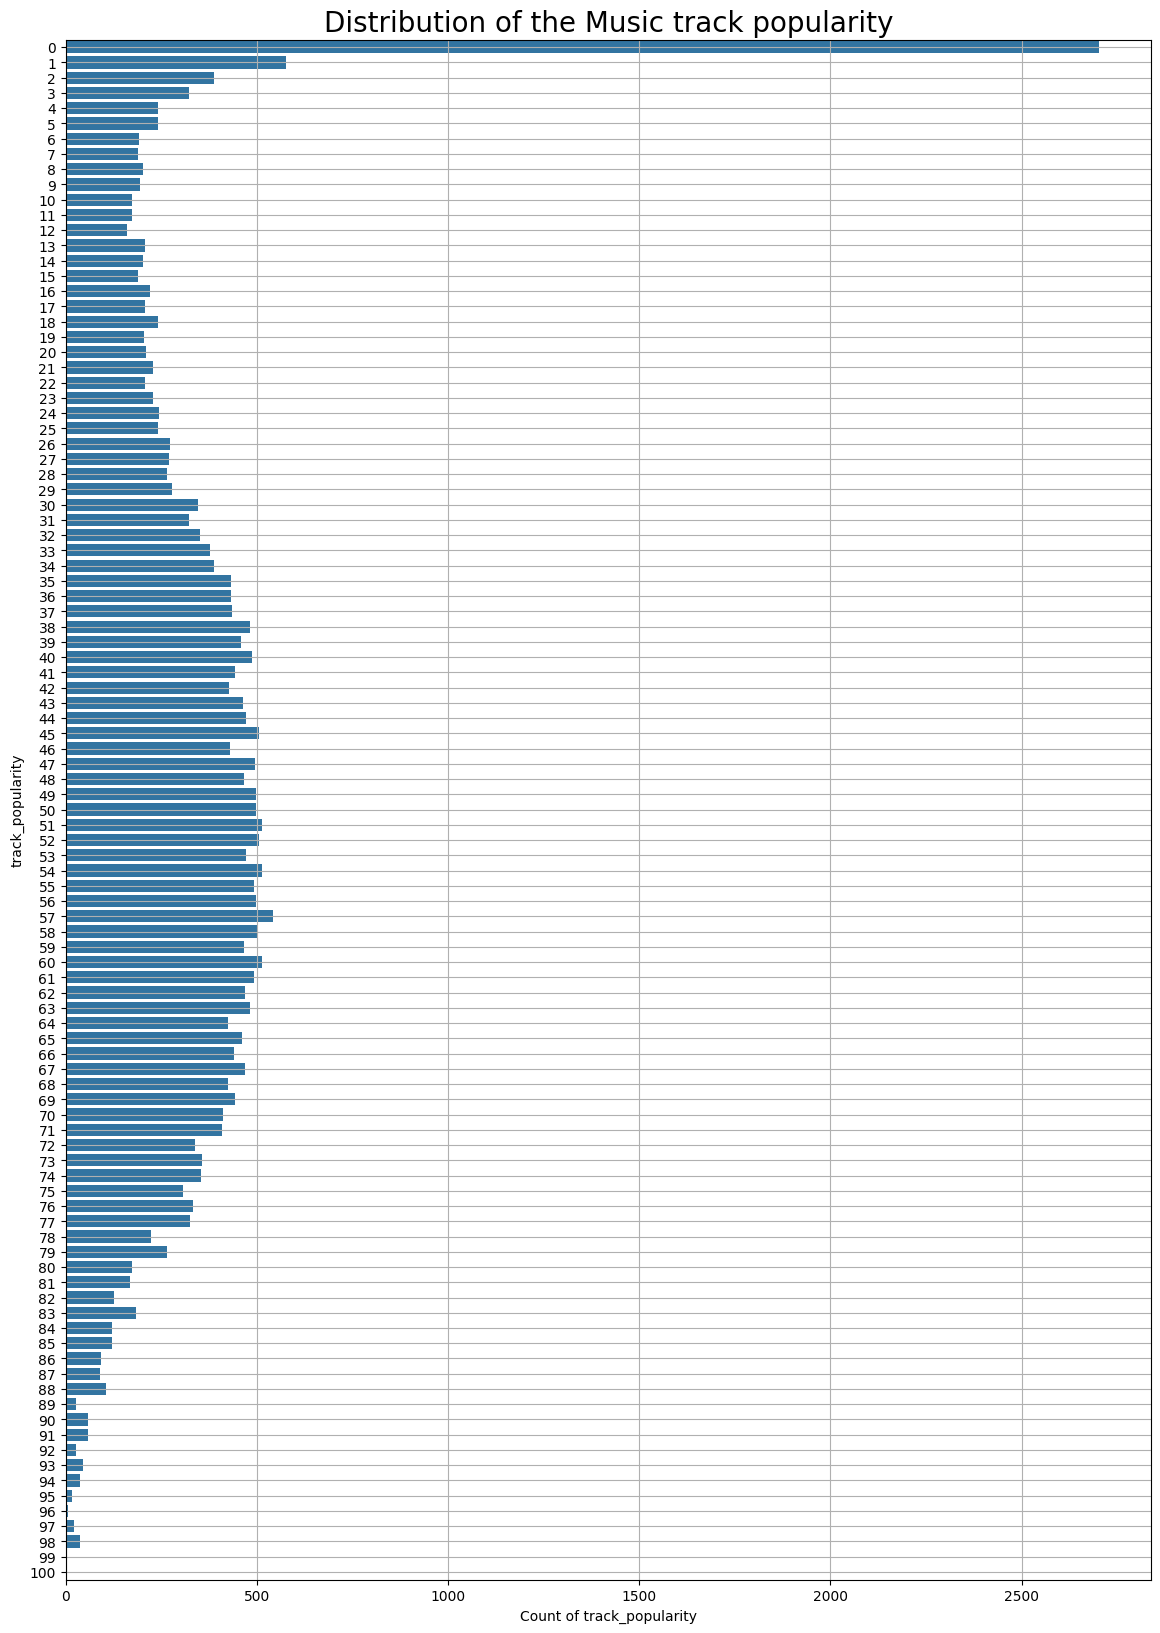

In [15]:
#plot of the track_popularity
plt.figure(figsize=(14,20))
sns.countplot(y=songs_data['track_popularity'])
plt.title('Distribution of the Music track popularity',size =20)
plt.ylabel('track_popularity')
plt.xlabel('Count of track_popularity')
plt.grid()
plt.show()

## Note: 
### 1. When the track popularity is 0, the number of the songs is highest (more then 2500), which means the songs mostly with low popularity.

In [16]:
#the categories of playlist_id
songs_data.playlist_id.value_counts()

playlist_id
4JkkvMpVl4lSioqQjeAL0q    247
37i9dQZF1DWTHM4kX49UKs    198
6KnQDwp0syvhfHOR4lWP7x    195
3xMQTDLOIGvj3lWH5e5x6F    189
3Ho3iO0iJykgEQNbjB2sic    182
                         ... 
4sr2xEhXQR5VuZ0LZX8TQ8      7
6dqoVI7qwYLyNqbg0MPad3      7
2CJsD3fcYJWcliEKnwmovU      6
6pPpLz42hUkr8gbMirkAEl      3
6HprqD6WZMx5peClrxaprN      1
Name: count, Length: 471, dtype: int64

In [17]:
#the categories of genre
songs_data.genre.value_counts()

genre
edm      6043
rap      5746
pop      5507
r&b      5431
latin    5155
rock     4951
Name: count, dtype: int64

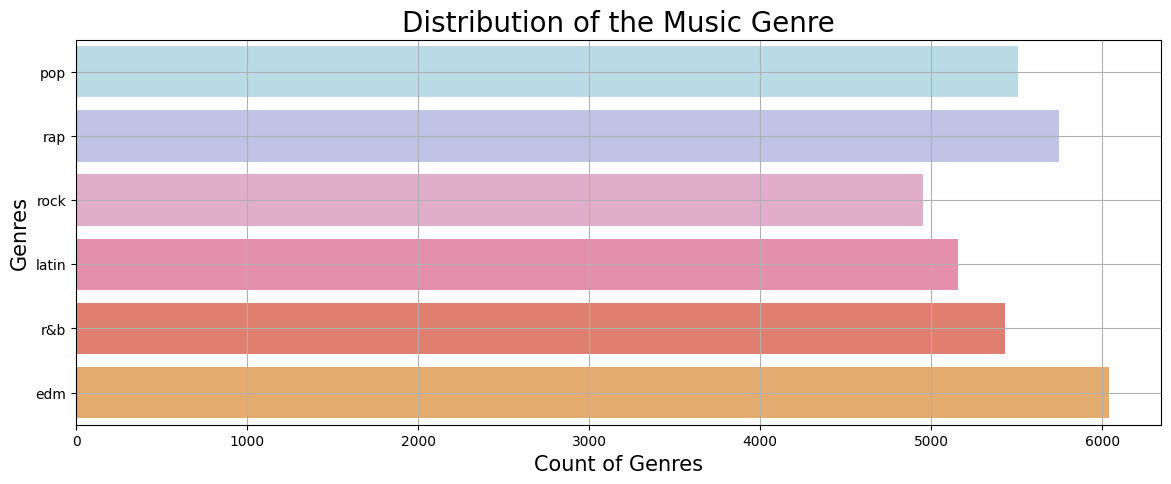

In [18]:
# Plot of Music Genre
# Create a color palette
palette = ['#B3DFEC', '#B9C0EA', '#E8A5CC', '#F282A7', '#F0725C','#F6AC5A']
plt.figure(figsize=(14,5))
sns.countplot(y=songs_data['genre'], hue=songs_data.genre, palette=palette)
plt.title('Distribution of the Music Genre',size=20)
plt.ylabel('Genres',size=15)
plt.xlabel('Count of Genres',size=15)
plt.grid()
plt.show()

## Note: 
### The numbers of different genres are similar and all of them have enough songs for the music classification. 
### 

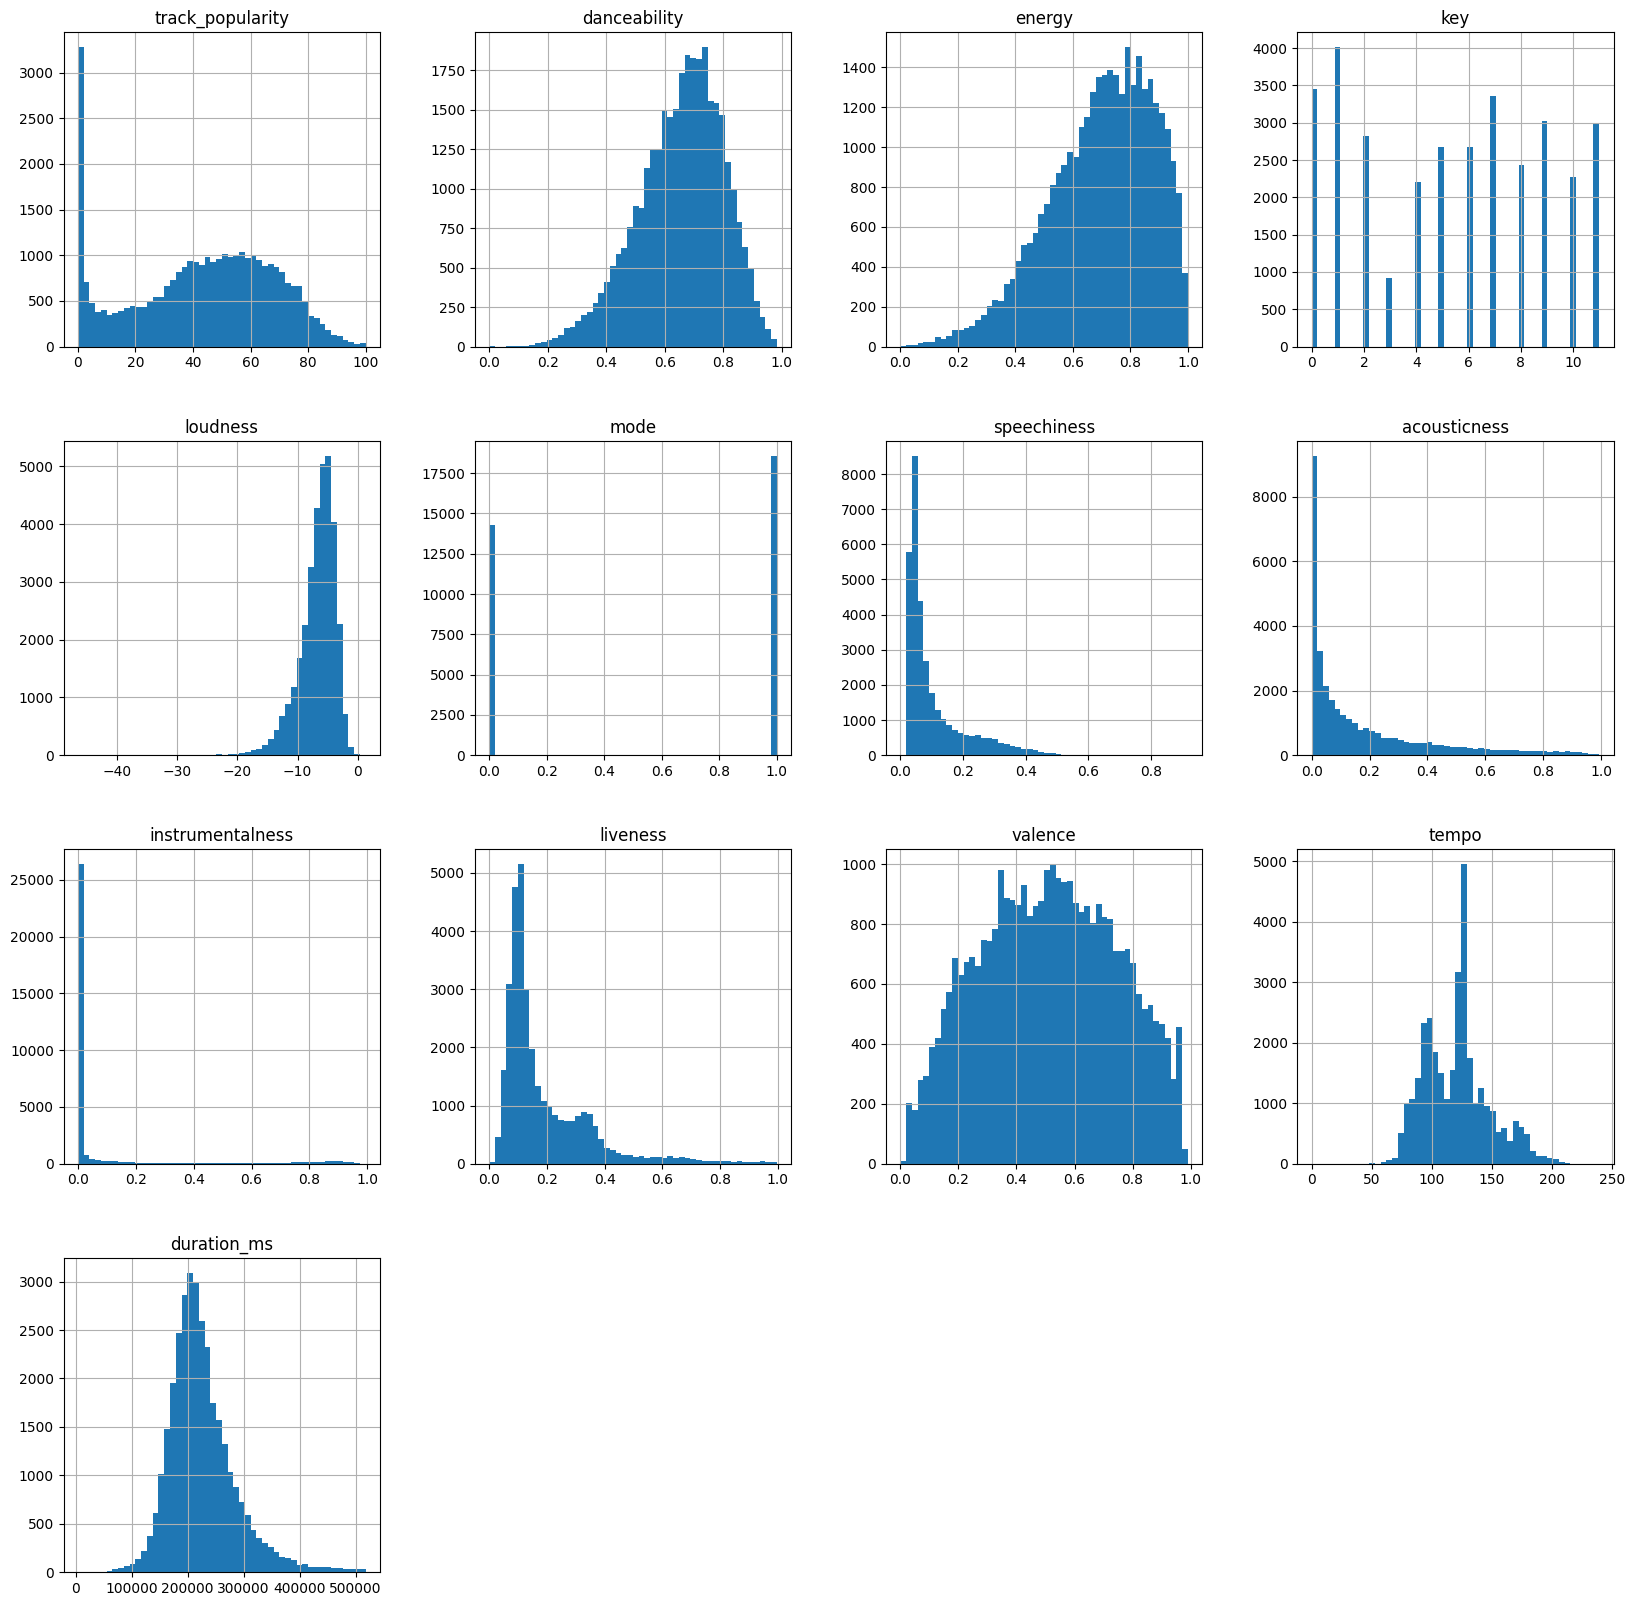

In [19]:
#create histogram of all the numerical features 
songs_data.hist(bins=50, figsize=(20,20))
plt.show()

## Note: 
### 1.Most songs have dancibility on the range between 0.6 and 0.8.
### 2. Most songs have energy on the range around 0.8.
### 3. The number of songs with 1st key  C♯/D♭ is biggest, while that with 3th key D♯/E♭ is smallest.
### 4. Almost all the songs wiht loudness that is higher than -20. Most songs have loudness on the range around -5.
### 5. The mode of the songs only consists of 0.0 (Minor) and 1.0 (Major). The number of songs with major mode is bigger, with around 18500, while the number of songs with minor mode is only around 14000.
### 6. Almost all the songs have speechiness less than 0.5, which means most of them consist of music part with vocal part. Most songs with speechiness less then 0.2, while means that are most likely represent music and other non-speech-like tracks.
### 7. Most of the songs have acousticness less than 0.2, which meana most of them are not acoustic. There are still a few songs with acousticness of almost 1.0, which means they have high confidence the track is acoustic.
### 8. More than 25000 songs with almost 0 instrumentalness, which means most of the songs contains vocal content.
### 9. Most songs have liveness under 0.4, which means most of them are unlikely to be live.  At point where the liveness is around 0.1, the number of the songs reach the peak. 
### 10. The range of valence is very wide, almost cover 0.0 to 1.0, which means they cover a wide range of positive and negative emotions. Most songs with the moderate valence. 
### 11. Most songs have the duration around 200000 ms(around 3min 20sec).
### 


# 2.0 Basic Feature comparison

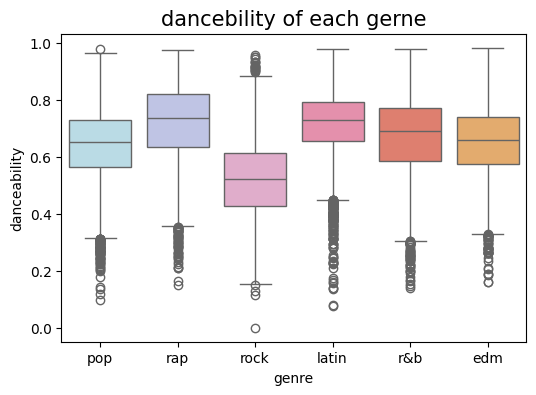

In [20]:
# distribution of dancebility
plt.rcParams["figure.figsize"] = (6,4)

sns.boxplot(y=songs_data.danceability, x=songs_data.genre, hue=songs_data.genre, palette=palette)
plt.title("dancebility of each gerne", size=15);

## Note: 
### The dancibility of the rock song is lowest, while the average dancibility of rap is highest. However, the dancibilities of the genres pop, latin, r&b, and edm are similar.
###

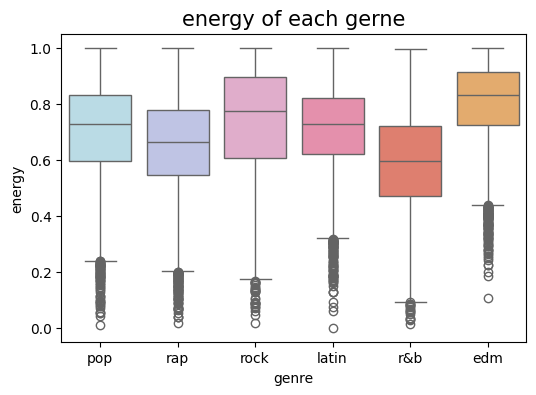

In [21]:
# distribution of energy 
plt.rcParams["figure.figsize"] = (6,4)

sns.boxplot(y=songs_data.energy, x=songs_data.genre, hue=songs_data.genre,palette=palette)
plt.title("energy of each gerne", size=15);

## Note: 
### The energy of the genre of edm is relatively high, and it might be a feature that we can use for classifying edm.
### 

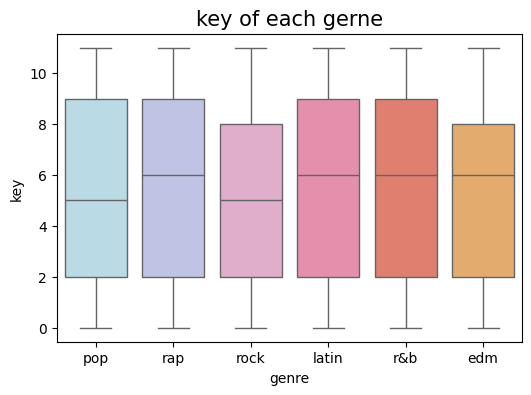

In [22]:
# distribution of key
plt.rcParams["figure.figsize"] = (6,4)

sns.boxplot(y=songs_data.key, x=songs_data.genre, hue=songs_data.genre,palette=palette)
plt.title("key of each gerne", size=15);

## Note: 
### Drop the value of key, because they show no siginificant differences between the genres for the prediction model.
##

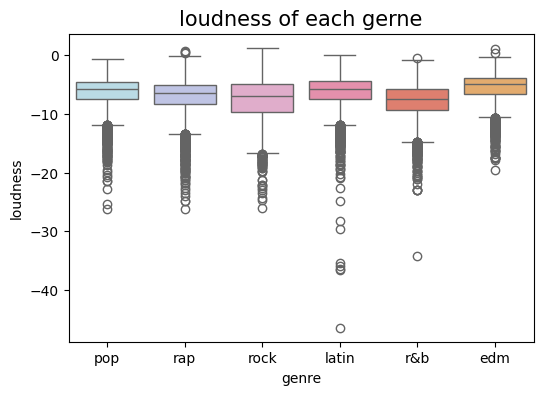

In [23]:
# distribution of loudness
plt.rcParams["figure.figsize"] = (6,4)

sns.boxplot(y=songs_data.loudness, x=songs_data.genre, hue=songs_data.genre,palette=palette)
plt.title("loudness of each gerne", size=15);

## Note: 
### Compared to other genre, the loudness of edm is higher. It can be a feature to classify edm.
###

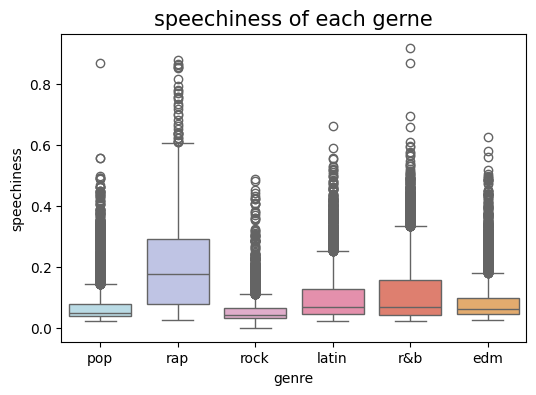

In [24]:
# distribution of speechiness
plt.rcParams["figure.figsize"] = (6,4)

sns.boxplot(y=songs_data.speechiness, x=songs_data.genre, hue=songs_data.genre,palette=palette)
plt.title("speechiness of each gerne", size=15);

## Note: 
### Compared to other genre, the speechniess of rap is high. It can be a feature to classify rap.
###

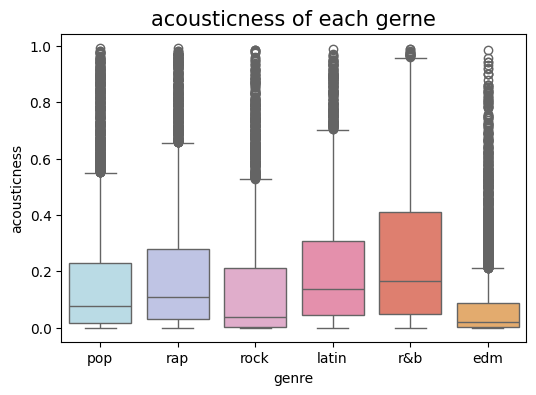

In [25]:
# distribution of acousticness
plt.rcParams["figure.figsize"] = (6,4)

sns.boxplot(y=songs_data.acousticness, x=songs_data.genre, hue=songs_data.genre,palette=palette)
plt.title("acousticness of each gerne", size=15);

# Note: 
### Compared to other genre, the acousticness of r&b is high. It can be a feature to classify r&b.
###

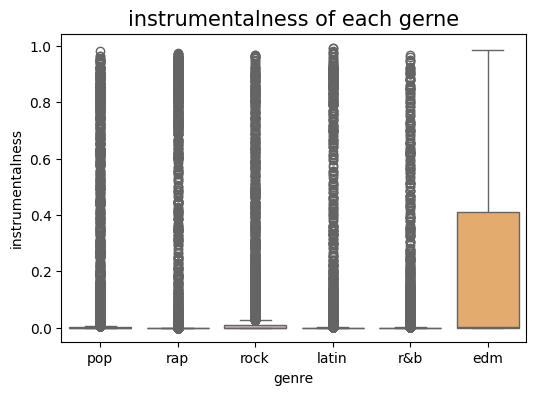

In [26]:
# distribution of instrumentalness
plt.rcParams["figure.figsize"] = (6,4)

sns.boxplot(y=songs_data.instrumentalness, x=songs_data.genre, hue=songs_data.genre,palette=palette)
plt.title("instrumentalness of each gerne", size=15);

## Note: 
### Drop the value of instrumentalness, because they show no siginificant differences among the genres for the prediction model, except for edm, which doesn't influence the prediction model a lot.
###

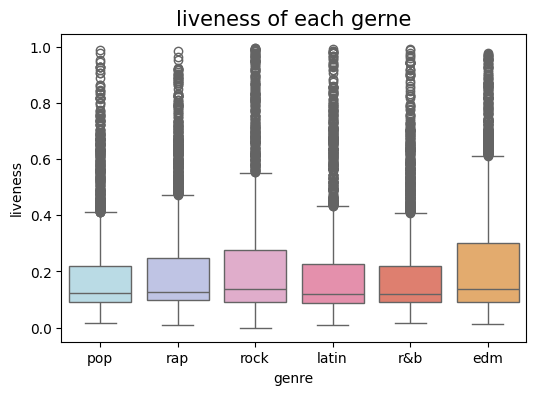

In [27]:
# distribution of liveness
plt.rcParams["figure.figsize"] = (6,4)

sns.boxplot(y=songs_data.liveness, x=songs_data.genre, hue=songs_data.genre,palette=palette)
plt.title("liveness of each gerne", size=15);

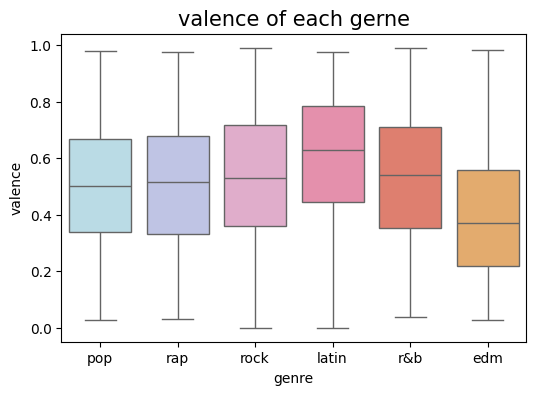

In [28]:
# distribution of valence 
plt.rcParams["figure.figsize"] = (6,4)

sns.boxplot(y=songs_data.valence, x=songs_data.genre, hue=songs_data.genre,palette=palette)
plt.title("valence of each gerne", size=15);

## Note: 
### Compared to other genre, the valence of latin is high. It can be a feature to classify latin.
###

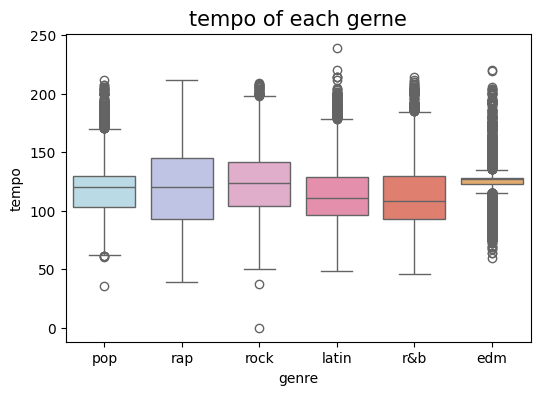

In [29]:
# distribution of tempo
plt.rcParams["figure.figsize"] = (6,4)

sns.boxplot(y=songs_data.tempo, x=songs_data.genre, hue=songs_data.genre,palette=palette)
plt.title("tempo of each gerne", size=15);

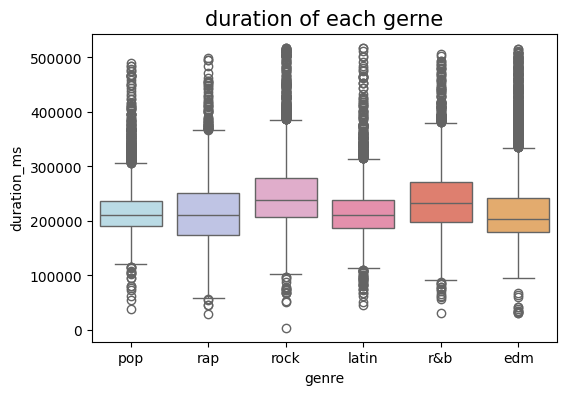

In [30]:
# distribution of duration
plt.rcParams["figure.figsize"] = (6,4)

sns.boxplot(y=songs_data.duration_ms, x=songs_data.genre, hue=songs_data.genre,palette=palette)
plt.title("duration of each gerne", size=15);

# 3.0 Clean the data

In [31]:
# Identify duplicates based on specific columns
duplicates = songs_data.duplicated(subset=["track_name", "track_artist","playlist_name"])
print(f"Number of duplicate rows: {duplicates.sum()}")
print("Duplicate rows:\n", songs_data[duplicates])
duplicates.head()

Number of duplicate rows: 658
Duplicate rows:
                      track_id  \
510    2V65y3PX4DkRhy1djlxd9p   
527    2AVredtzre1KADDXWoGd4I   
1348   4VginDwYTP2eaHJzO0QMjG   
1349   421leiR6jKlH5KDdwLYrOs   
1358   4evmHXcjt3bTUHD1cvny97   
...                       ...   
31121  5fp6j7TdmXpmKM6QEDL6ZA   
31122  1CuBioSnK1CMLeKDmNpoix   
31482  4gjrsP1Tmrqh1IiHhMXQm5   
31536  1dssHOp3HpaK9o5c0CL7xU   
31863  7LzahanKFAWdfrqKEjiUli   

                                              track_name         track_artist  \
510                   Don't You Worry Child - Radio Edit  Swedish House Mafia   
527                                      Like I Love You     Lost Frequencies   
1348                                             Circles          Post Malone   
1349                                        Dance Monkey          Tones and I   
1358                     Beautiful People (feat. Khalid)           Ed Sheeran   
...                                                  ...              

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [32]:
#clean the duplicated song data
clean_songs_data = songs_data.drop_duplicates(subset=["track_name", "track_artist","playlist_name"]) 
print(clean_songs_data)

# save the data
clean_songs_data.to_csv("../data/clean_songs_data.csv", index=False)

                     track_id  \
0      6f807x0ima9a1j3VPbc7VN   
1      0r7CVbZTWZgbTCYdfa2P31   
2      1z1Hg7Vb0AhHDiEmnDE79l   
3      75FpbthrwQmzHlBJLuGdC7   
4      1e8PAfcKUYoKkxPhrHqw4x   
...                       ...   
32828  7bxnKAamR3snQ1VGLuVfC1   
32829  5Aevni09Em4575077nkWHz   
32830  7ImMqPP3Q1yfUHvsdn7wEo   
32831  2m69mhnfQ1Oq6lGtXuYhgX   
32832  29zWqhca3zt5NsckZqDf6c   

                                              track_name      track_artist  \
0      I Don't Care (with Justin Bieber) - Loud Luxur...        Ed Sheeran   
1                        Memories - Dillon Francis Remix          Maroon 5   
2                        All the Time - Don Diablo Remix      Zara Larsson   
3                      Call You Mine - Keanu Silva Remix  The Chainsmokers   
4                Someone You Loved - Future Humans Remix     Lewis Capaldi   
...                                                  ...               ...   
32828               City Of Lights - Official Radio Edit 

In [33]:
# Drop unnecessary columns
columns_to_drop = [
    'track_name', 'track_artist', 'track_popularity', 
    'playlist_name', 'playlist_id', 'key', 'instrumentalness'
]
df_cleaned = clean_songs_data.drop(columns=columns_to_drop)
df_cleaned.to_csv("../data/df_cleaned.csv", index=False)

In [34]:
df_cleaned.head()

,track_id,genre,danceability,energy,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,pop,0.748,0.916,-2.634,1,0.0583,0.1020,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,pop,0.726,0.815,-4.969,1,0.0373,0.0724,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,pop,0.675,0.931,-3.432,0,0.0742,0.0794,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,pop,0.718,0.930,-3.778,1,0.1020,0.0287,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,pop,0.650,0.833,-4.672,1,0.0359,0.0803,0.0833,0.725,123.976,189052


# 4.0 Data Classification

In [35]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from learning_curve_plot import learning_curve_plot

In [36]:
# This section encodes the 'genre' column into numerical values using LabelEncoder
label_encoder = LabelEncoder()
df_cleaned['genre_encoded'] = label_encoder.fit_transform(df_cleaned['genre'])

In [37]:
# Drop the original 'genre' column
df_encoded = df_cleaned.drop(columns=['genre'])

In [38]:
df_encoded.head()

,track_id,danceability,energy,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration_ms,genre_encoded
0,6f807x0ima9a1j3VPbc7VN,0.748,0.916,-2.634,1,0.0583,0.1020,0.0653,0.518,122.036,194754,2
1,0r7CVbZTWZgbTCYdfa2P31,0.726,0.815,-4.969,1,0.0373,0.0724,0.3570,0.693,99.972,162600,2
2,1z1Hg7Vb0AhHDiEmnDE79l,0.675,0.931,-3.432,0,0.0742,0.0794,0.1100,0.613,124.008,176616,2
3,75FpbthrwQmzHlBJLuGdC7,0.718,0.930,-3.778,1,0.1020,0.0287,0.2040,0.277,121.956,169093,2
4,1e8PAfcKUYoKkxPhrHqw4x,0.650,0.833,-4.672,1,0.0359,0.0803,0.0833,0.725,123.976,189052,2


## Note: 
### Encoded: 0. edm, 1. Latin, 2. pop, 3. R&B, 4. rap, 5. rock 

In [39]:
# save the data
df_encoded.to_csv("../data/df_encoded.csv", index=False)

In [40]:
# Define features and target variable
X = df_encoded.drop(columns=['track_id', 'genre_encoded'])
y = df_encoded['genre_encoded']

In [41]:
# Split the data into training and testing sets 80/20 subsets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 4.1 Decision Tree

In [42]:
# importing the algorithm
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier()

In [43]:
# training your machine learning model

clf_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [44]:
# predict the labels for the test set

y_pred_dt = clf_tree.predict(X_test)
y_pred_dt

array([1, 5, 5, ..., 3, 3, 1])

In [45]:
y_test

11167    4
3919     2
15879    5
11577    5
21691    3
        ..
17748    1
15624    5
22455    3
9711     4
24698    3
Name: genre_encoded, Length: 6435, dtype: int64

In [46]:
accuracy_score(y_test, y_pred_dt)

0.43605283605283607

In [47]:
# Use one of the following depending on your requirement
recall = recall_score(y_test, y_pred_dt, average='micro')   # or 'macro', 'weighted'
print(recall)

0.43605283605283607


In [48]:
precision_score(y_test, y_pred_dt, average='micro')

0.43605283605283607

In [49]:
f1_score(y_test, y_pred_dt,average='micro')

0.43605283605283607

In [50]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.54      0.56      0.55      1160
           1       0.37      0.41      0.39      1001
           2       0.27      0.28      0.28      1075
           3       0.37      0.38      0.37      1037
           4       0.51      0.44      0.47      1180
           5       0.57      0.54      0.55       982

    accuracy                           0.44      6435
   macro avg       0.44      0.44      0.44      6435
weighted avg       0.44      0.44      0.44      6435



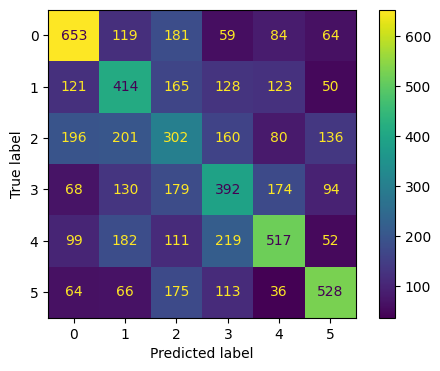

In [51]:
# Note: Encoded: 0. edm, 1. Latin, 2. pop, 3. R&B, 4. rap, 5. rock 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# plot confusion matrix

cm = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf_tree.classes_)

disp.plot();

## Note： 

### 1. 0 edm, 4 rap and 5 rock have relatively high scores in the plot confusion matrix, while 1 latin, 2 pop and 3 R&B have relatively low scores, especially pop.
### 2. Generally, using desicion trees produces less accurate prediction result. 

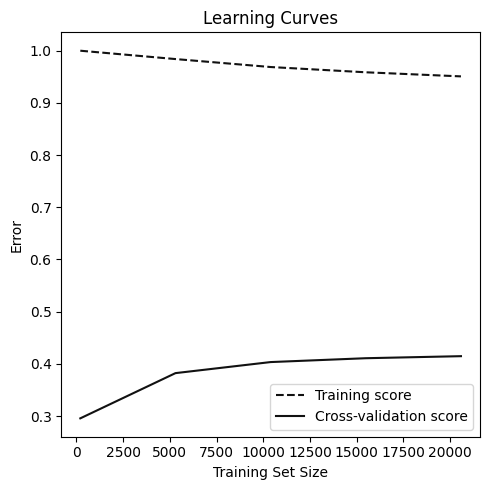

In [52]:
learning_curve_plot(clf_tree, X_train, y_train, scoring = 'accuracy')

## Note:
### Using desicion tree as the training model, there is a significant gap between the training score (which shows high performance, around 0.95) and the cross-validation score (which is relatively low, only a little bit more than 0.4)
### 

## 4.2 Random Forest

In [53]:
# importing the algorithm
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier()

In [54]:
clf_rf.fit(X_train, y_train)

RandomForestClassifier()

In [55]:
y_pred_rf = clf_rf.predict(X_test)

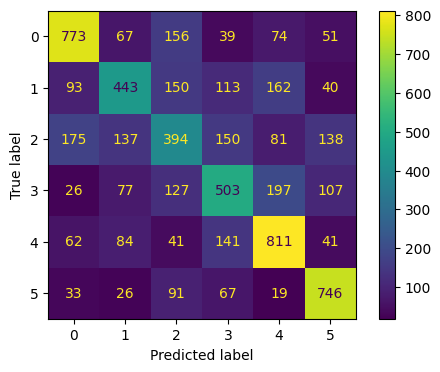

In [56]:
# Note: Encoded: 0. edm, 1. Latin, 2. pop, 3. R&B, 4. rap, 5. rock 
# plot confusion matrix

cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf_rf.classes_)

disp.plot();

## Note： 

### 1. 0 edm, 4 rap and 5 rock have relatively high scores in the plot confusion matrix, while 1 latin, 2 pop and 3 R&B have relatively low score, especially pop.
### 2. The result means that, the predictions of edm, rap and rock are more accurate, but those of latin, pop and R&B are less accurate and overlap genres due to similar attributes in the music style.
###

In [57]:
precision_score(y_test, y_pred_rf,average='micro')

0.5703185703185704

In [58]:
accuracy_score(y_test, y_pred_rf)

0.5703185703185704

In [59]:
recall_score(y_test, y_pred_rf,average='macro')

0.5679106147384175

In [60]:
f1_score(y_test, y_pred_rf,average='macro')

0.5630340235110711

In [62]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67      1160
           1       0.53      0.44      0.48      1001
           2       0.41      0.37      0.39      1075
           3       0.50      0.49      0.49      1037
           4       0.60      0.69      0.64      1180
           5       0.66      0.76      0.71       982

    accuracy                           0.57      6435
   macro avg       0.56      0.57      0.56      6435
weighted avg       0.56      0.57      0.56      6435



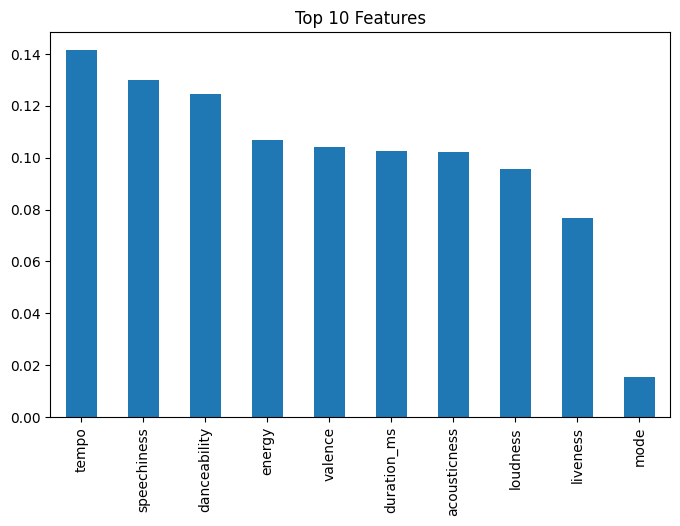

In [63]:
# Plot the feature importance

import matplotlib.pyplot as plt

def feature_importance_plot(model, X_train, n):
    """Plots feature importance - this only works for Random Forest and XGBoost Models

    @param model - the trained model
    @param X_train dataframe - the training dataset
    @param n int - the number of features we are interested in plotting
    
    @return a plot with the Top n features
    """
    
    plt.figure(figsize=(8, 5)) # set figure size
    feat_importances = pd.Series(model.feature_importances_,
                                 index = X_train.columns)
    feat_importances.nlargest(n).plot(kind = 'bar')
    plt.title(f"Top {n} Features")
    plt.show()


feature_importance_plot(clf_rf, X_train, n = 10)

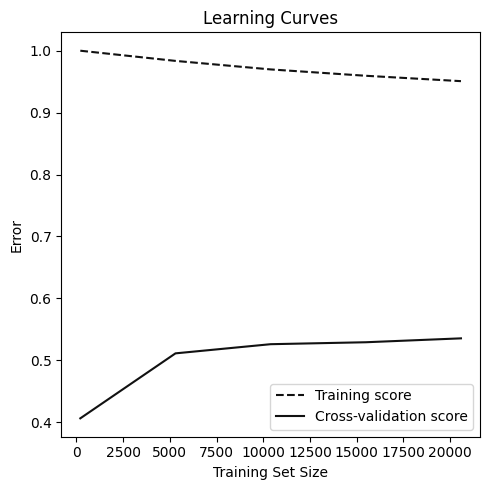

In [64]:
learning_curve_plot(clf_rf, X_train, y_train, scoring = 'accuracy')

## Note:
### Using random forest as the training model, there is a significant gap between the training score (which shows high performance, around 0.95) and the cross-validation score (which is relatively low, only a little bit more than 0.5)
### 

## 4.3 XGBoost

In [65]:
# import the xgboost
from xgboost import XGBClassifier

clf_xgb = XGBClassifier()

In [66]:
clf_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [67]:
y_pred_xgb = clf_xgb.predict(X_test)

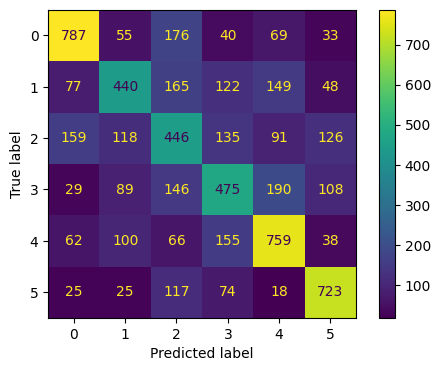

In [68]:
# Note: Encoded: 0. edm, 1. latin, 2. pop, 3. R&B, 4. rap, 5. rock 
# plot confusion matrix

cm = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf_xgb.classes_)

disp.plot();

## Note： 

### 1. 0 edm, 4 rap and 5 rock have relatively high scores in the plot confusion matrix(787,759 and 723), while 1 latin, 2 pop and 3 R&B have relatively low scores(440,446 and 475). With XGBoot, the prediction of pop shows no significant lower result than the other two. 
### 2. The result means that, the predictions of edm, rap and rock are more accurate, but those of latin, pop and R&B are less accurate and overlap genres due to similar attributes in the music style.
###

In [69]:
precision_score(y_test, y_pred_xgb,average='micro')

0.5641025641025641

In [70]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.69      0.68      0.68      1160
           1       0.53      0.44      0.48      1001
           2       0.40      0.41      0.41      1075
           3       0.47      0.46      0.47      1037
           4       0.59      0.64      0.62      1180
           5       0.67      0.74      0.70       982

    accuracy                           0.56      6435
   macro avg       0.56      0.56      0.56      6435
weighted avg       0.56      0.56      0.56      6435



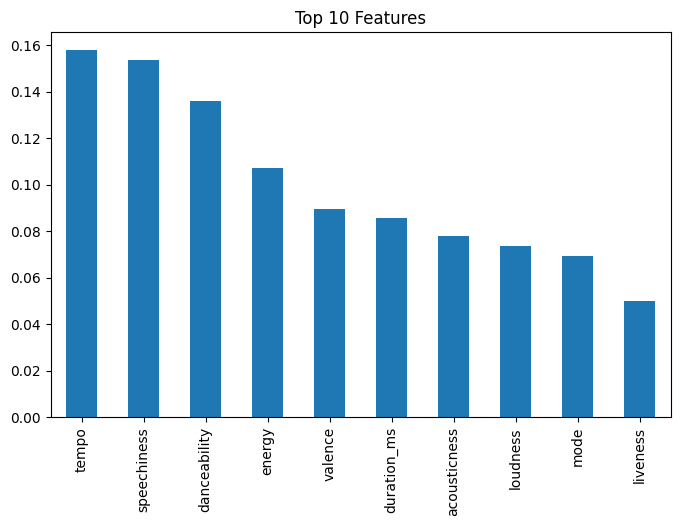

In [71]:
feature_importance_plot(clf_xgb, X_train, n = 10)

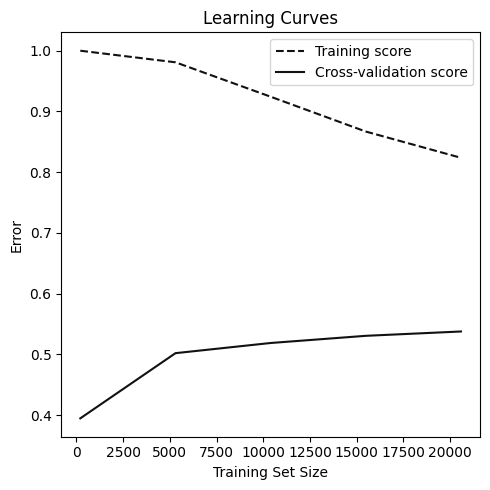

In [72]:
learning_curve_plot(clf_xgb, X_train, y_train, scoring = 'accuracy')

## Note:
### Using XGBoost as the training model, there is a significant gap between the training score (which shows lower performance, around 0.85) and the cross-validation score (which is still relatively low, only a little bit more than 0.5).
### 

# 4.3 Summary

In [73]:
# This code is just for demonstration, and to compare the metrics of the models

pd.DataFrame({"Model Name": ['desicion tree','Random Forest', 'XGBoost'],
              "Accuracy": [
                           round(accuracy_score(y_test, y_pred_dt), 2),
                           round(accuracy_score(y_test, y_pred_rf), 2),
                           round(accuracy_score(y_test, y_pred_xgb), 2)
                          ],
              "Recall": [ 
                        round(recall_score(y_test, y_pred_dt,average='macro'), 2),
                        round(recall_score(y_test, y_pred_rf,average='macro'), 2),
                        round(recall_score(y_test, y_pred_xgb,average='macro'), 2)],
              "Precision": [
                           round(precision_score(y_test, y_pred_dt,average='micro'), 2),
                           round(precision_score(y_test, y_pred_rf,average='micro'), 2),
                           round(precision_score(y_test, y_pred_xgb,average='micro'), 2)],
              "F1-Score": [ 
                           round(f1_score(y_test, y_pred_dt,average='macro'), 2),
                           round(f1_score(y_test, y_pred_rf,average='macro'), 2),
                           round(f1_score(y_test, y_pred_xgb,average='macro'), 2)],
             })

# Question - which Model has a highest accuracy, recall, precision and f1-score?

,Model Name,Accuracy,Recall,Precision,F1-Score
0,desicion tree,0.44,0.44,0.44,0.44
1,Random Forest,0.57,0.57,0.57,0.56
2,XGBoost,0.56,0.56,0.56,0.56


## Evaluation: 
### 1. The accuracy, recall, precision and F1-Score of desicion tree model is pretty low, only 0.44. That's why we should avoid using decision tree.
### 2. The performance of model Random Forest and XGBoot is better than desicion trees and they have similar results, regarding the accuracy, recall, precision and F1-Score. 
### 3. However, the scores are generally not really high. From the result of the plot confusion matrix above, it is showed that, the prediction of three gernes(edm, rap and rock) are accurate and the other(latin, pop and R&B) are less accurate. That is why the generally prediction model only scores above 50%.
### 4.Generally speaking, the learning curves might be overfitting, meaning that the model learns the noise and details of the training data too well, but fails to generalize to unseen data, which leads to poor performance on the cross-validation set.